In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import spacy
from spacy.lang.es.examples import sentences 


nlp = spacy.load('C:\ProgramData\Miniconda3\Lib\site-packages\es_core_news_lg\es_core_news_lg-3.2.0')

In [3]:
tweets = pd.read_csv("tweets_volcan_es_2.csv", header=None, names=['tweet'], encoding='latin-1')
tweets = tweets.dropna()
tweets.columns = [ 'text']

tweets.drop_duplicates(subset ='text', keep = False, inplace = True) 
tweets.head()

,text
1,b'@rajote Ciertamente no veo protestas por el ...
2,"b'Terremoto de 4,9 en la isla espanola del vol..."
3,b'@EmmaRincon Por favor no puedo leer estas co...
4,"b'Ademas, el sismografo del Instituto Geografi..."
5,"b'Con respecto a que estadio pesa mas,si el vo..."


In [4]:
tweets.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5512 entries, 1 to 5626
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    5512 non-null   object
dtypes: object(1)
memory usage: 86.1+ KB


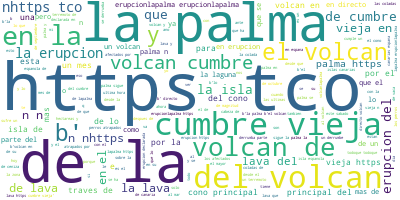

In [5]:
import re
# Remove punctuation

tweets['paper_text_processed'] = \
tweets['text'].map(lambda x: re.sub('[,\.!?]', '', x))
# Convert the titles to lowercase
tweets['paper_text_processed'] = \
tweets['paper_text_processed'].map(lambda x: x.lower())

# Remove stop words?¿?¿?¿
#import re
#from nltk.corpus import stopwords

#important_words=[]
#for paper in papers:
 #   if paper not in stopwords.words('spanish'):
  #      important_words.append(papers)

#print (important_words)

# Print out the first rows of papers
tweets['paper_text_processed'].head()
#!pip install wordcloud
# Import the wordcloud library
from wordcloud import WordCloud
# Join the different processed titles together.

long_string = ','.join(list(tweets['paper_text_processed'].values))
#long_string = ','.join(list(papers['important_words'].values))
# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')
# Generate a word cloud
wordcloud.generate(long_string)
# Visualize the word cloud
wordcloud.to_image()

In [12]:
from spacy.tokenizer import Tokenizer
from sklearn.feature_extraction.text import TfidfVectorizer
from spacy.lang.es.stop_words import STOP_WORDS as es_stop
from nltk.tokenize import word_tokenize
all_stopwords = nlp.Defaults.stop_words
print(all_stopwords)

#final_stopwords_list = list(es_stop) 
#tfidf_vectorizer = TfidfVectorizer(max_df=0.8, max_features=200000, min_df=0.2, stop_words=final_stopwords_list, use_idf=True, tokenizer=nlp.tokenizer)

tokenizer = nlp.tokenizer
aux=word_tokenize(long_string)
text_tokens = tokenizer(long_string)
print(len(text_tokens))
#print(text_tokens)
tokens_without_sw= [word for word in aux if not word in all_stopwords]
print(len(tokens_without_sw))

#print(tokens_without_sw)
#tokens_without_sw= [word for word in tfidf_vectorizer if not word in all_stopwords]
#print(tokens_without_sw)

{'además', 'mias', 'porque', 'uso', 'gueno', 'ello', 'las', 'dice', 'bien', 'cómo', 'cualquier', 'excepto', 'alrededor', 'podria', 'afirmó', 'hicieron', 'fueron', 'mientras', 'todo', 'usas', 'del', 'cuantas', 'quien', 'aquéllas', 'los', 'van', 'como', 'míos', 'cuenta', 'la', 'sus', 'ayer', 'tanto', 'quedó', 'verdad', 'intentais', 'diferente', 'sabe', 'bastante', 'dias', 'ningunas', 'podría', 'sigue', 'vez', 'saben', 'estais', 'poco', 'quizás', 'estuvo', 'aun', 'sin', 'trabaja', 'cada', 'próximos', 'cuánto', 'creo', 'dio', 'delante', 'mía', 'aquellos', 'usa', 'quizá', 'algunos', 'pueda', 'tú', 'apenas', 'propias', 'vuestras', 'tres', 'enseguida', 'ellos', 'conseguir', 'quiere', 'todos', 'usar', 'propia', 'tu', 'actualmente', 'haber', 'siguiente', 'intentamos', 'nuestros', 'ahi', 'ex', 'nadie', 'mios', 'conseguimos', 'paìs', 'próximo', 'dijeron', 'aquellas', 'podriamos', 'explicó', 'al', 'supuesto', 'ambos', 'queremos', 'temprano', 'demasiado', 'existen', 'siete', 'mejor', 'poca', 'mia',

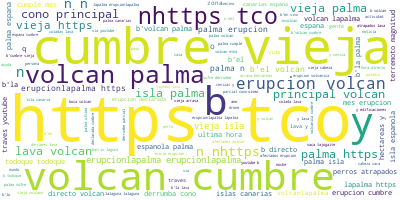

In [7]:
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')
unique_string=(" ").join(tokens_without_sw)
#wordcloud = WordCloud(width = 1000, height = 500).generate(unique_string)
# Generate a word cloud
#text2= "".join(tokens_without_sw)
#text2 = bytearray([self.byte_decoder[c] for c in text]).decode("utf-8", errors=self.errors)
#long_string2 = ','.join(list(tokens_without_sw['paper_text_processed'].values))
#!pip install nltk
#text2=''.join(token.text_with_ws for token in tokens_without_sw)
#from nltk.tokenize.treebank import TreebankWordDetokenizer
#text2=TreebankWordDetokenizer().detokenize([tokens_without_sw])
wordcloud.generate(unique_string)
# Visualize the word cloud
wordcloud.to_image()

In [48]:
new_stop_words={'nosotras', 'sí', 'último', 'agregó', 'hizo', 'varias', 'pasado', 'estado', 'sea', 'un', 'era', 'cuantas',
                'alguno', 'habia', 'aunque', 'enseguida', 'debido', 'mia', 'que', 'pero', 'para', 'allí', 'cuales', 'despues', 'segun',     #
                'nos', 'estan', 'sabemos', 'emplean', 'será', 'tercera', 'todos', 'tuvo', 'dar', 'sabe', 'aún', 'medio', 'próximos', 'tú', 'me',    #
                'cual', 'delante', 'ejemplo', 'cuánta', 'está', 'conocer', 'quien', 'salvo', 'vais', 'contra', 'bueno', 'nuestra', 'ocho', 'expresó', #
                'hoy', 'solos', 'tenga', 'tarde', 'sido', 'verdadera', 'propios', 'mismas', 'tengo', 'ninguna', 'mio', 'dias', 'aquél', 'vaya', 
                'solamente', 'ahí', 'pocas', 'final', 'considera', 'hago', 'en', 'yo', 'cierto', 'otro', 'dio', 'cuatro', 'deben', 'última', 'algunos', #
                'los', 'incluso', 'pues', 'todavia', 'queremos', 'tu', 'voy', 'eran', 'nada', 'dentro', 'aquello', 'emplear', 'partir', 'temprano', #
                'nosotros', 'sin', 'mientras', 'general', 'haber', 'debajo', 'habrá', 'he', 'hicieron', 'ser', 'cierta', 'ese', 'quiza', 'menudo', 'su', #
                'apenas', 'ésta', 'ni', 'éstos', 'parece', 'quizas', 'unos', 'ellas', 'consiguen', 'del', 'sera', 'ti', 'cuantos', 'estuvo', # intentan
                'cómo', 'segunda', 'poner', 'así', 'porque', 'que', 'veces', 'ciertas', 'aquélla', 'tres', 'casi', 'estar', 'encuentra', 'uno', 'pronto', #
                'dijeron', 'ante', 'habían', 'aqui', 'realizado', 'creo', 'primera', 'saber', 'les', 'comentó', 'algo', 'empleas', 'sobre', 'sino', 'hubo',#
                'vosotros', 'decir', 'esta', 'puedo', 'algunas', 'luego', 'vuestras', 'fueron', 'mismo', 'dice', 'haciendo', 'podrán', #nuevas, mayor?
                'respecto', 'estaba', 'según', 'usa', 'míos', 'eramos', 'podrian', 'tuya', 'hecho', 'cosas', 'ambos', 'vez', 'propias', # próximo, grandes
                'hacerlo', 'quiere', 'cuáles', 'ayer', 'trabajamos', 'bajo', 'nadie', 'saben', 'mias', 'buena', 'cuando', 'ya', 'quiénes', 'afirmó', 'paìs', #
                'embargo', 'tienen', 'estos', 'tuyas', 'éste', 'da', 'consideró', 'somos', 'cuenta', 'asi', 'vuestro', 'poco', 'ahi', 'hacer', 'todavía', 'va', #
                'usamos', 'realizar', 'mismos', 'quienes', 'tal', 'aquel', 'una', 'haceis', 'durante', 'esos', 'valor', 'cuanta', 'diferente', #varios
                'igual', 'todas', 'tus', 'como', 'estamos', 'realizó', 'soyos', 'otras', 'tenemos', 'debe', 'lugar', 'sus', 'tendrán', #trabajar, pocos
                'sean', 'esa', 'ahora', 'principalmente', 'propia', 'quizá', 'quién', 'toda', 'dicho', 'ella', 'ello', 'muchas', 'tuyo', 'el', 'más', 'ver', #
                'sigue', 'horas', 'demasiado', 'manifestó', 'dos', 'siguiente', 'tanto', 'lo', 'parte', 'desde', 'consigues', 'arriba', 'dia', 'podeis', #
                'poder', 'van', 'dijo', 'trata', 'siempre', 'cuanto', 'detrás', 'quedó', 'adelante', 'entre', 'pasada', 'ex', 'podrias', #intentamos
                'no', 'vuestra', 'consigue', 'después', 'eso', 'raras', 'eras', 'estará', 'mediante', 'actualmente', 'nuestro', 'es',
                'supuesto', 'algún', 'estoy', 'primero', 'aun', 'buen', 'antano', 'dado', 'puede', 'tenido', 'os', 'todo', 'cuál', 'muy', 'habla', #trabajas
                'mencionó', 'intenta', 'sabes', 'atras', 'esas', 'excepto', 'manera', 'adrede', 'solas', 'nuestros', 'unas', 'verdad', 'contigo', 'mucha', #
                'cerca', 'ampleamos', 'intento', 'día', 'ustedes', 'cualquier', 'ésas', 'haces', 'siendo', 'menos', 'qué', 'existen', 'ellos', 'han', #ningún
                'donde', 'modo', 'fuimos', 'detras', 'se', 'dan', 'sé', 'tras', 'hay', 'usais', 'le', 'estais', 'proximo', #dejó, despacio, últimos, último
                'lleva', 'junto', 'nuestras', 'ningunas', 'otra', 'repente', 'arribaabajo', 'pueden', 'mios', 'antes', 'poca', 'tiempo', 'segundo', 'de', 'informo', #
                'consigo', 'por', 'seis', 'días', 'hacia', 'suya', 'usted', 'podrían', 'cuántos', 'mal', 'aquellas', 'conmigo', #trabajais, empleais, 
                'estados', 'tiene', 'vamos', 'podria', 'entonces', 'demás', 'mí', 'ir', 'éstas', 'tenía', 'cuándo', 'hablan', 'siete', 'teneis',
                'con', 'ése', 'otros', 'sois', 'usan', 'fuera', 'aquella', 'breve', 'soy', 'dicen', 'podriamos', 'alguna', 'antaño', 'son', 'uso',#trabajo, 
                'hacemos', 'podrá', 'indicó', 'hasta', 'aproximadamente', 'podriais', 'estas', 'serán', 'además', 'conseguir', 'dónde', 'este', 'lado', 'ésa',#
                'mía', 'mío', 'están', 'suyo', 'quizás', 'fui', 'también', 'tampoco', 'ademas', 'aquéllos', 'verdadero', 'nuevo', 'al',#mejor, buenas, 
                'mis', 'llevar', 'tan', 'explicó', 'mi', 'sería', 'anterior', 'usar', 'ningunos', 'nuevos', 'primer', 'eres', 'posible', 'cuántas', 'ciertos',#
                'añadió', 'intentar', 'si', 'llegó', 'encima', 'pudo', 'misma', 'podemos', 'te', 'aquellos', 'deprisa',
                'hace', 'aseguró', 'momento', 'través', 'bueno', 'señaló', 'sabeis', 'fin', 'total', 'conseguimos', 'la', 'diferentes', 'estaban',#lejos
                'había', 'informó', 'mías', 'él', 'dieron', 'cinco', 'usas', 'fue', 'primeros', 'tendrá', 'intentais', 'claro',#ninguno, mucho, trabaja,
                'propio', 'aquéllas', 'suyas', 'ésos', 'sólo', 'pueda', 'existe', 'tuyos', 'tener', 'nunca', 'largo', 'aquí', 'enfrente', 'alli', 'vuestros',#nueva,
                'esto', 'alrededor', 'vosotras', 'acuerdo', 'pesar', 'cada', 'hemos', 'pais', 'tambien', 'buenos', 'las', 'haya', 'podría', 'cuánto', 'hacen', 'ha',
                'volcan', 'https', 'palma', 'cumbre', 'vieja', 'tco', 'nhttps', 'lava', 'erupción', 'erupcion', 'lapalma', 'directo', 'mas', 'traves', 'oct', 'canarias', 
                'mes', 'cono'}#
len(new_stop_words)

530

In [49]:
#!pip install gensim
import gensim
from gensim.utils import simple_preprocess
import nltk
import gensim.corpora as corpora
def sent_to_words(sentences):
    for sentence in sentences:
        # deacc=True removes punctuations
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) 
             if word not in new_stop_words] for doc in texts]
data = tweets.paper_text_processed.values.tolist()
data_words = list(sent_to_words(data))
# remove stop words
data_words = remove_stopwords(data_words)
# Create Dictionary
id2word = corpora.Dictionary(data_words)
# Create Corpus
texts = data_words
# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]
# View
print(corpus[:1][0][:30])

[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1)]


In [50]:
from pprint import pprint
# number of topics
num_topics = 7
# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics)
# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.019*"erupcionlapalma" + 0.006*"isla" + 0.005*"espana" + 0.004*"colada" + '
  '0.003*"hora" + 0.003*"fotos" + 0.003*"ultima" + 0.003*"via" + '
  '0.003*"coladas" + 0.003*"imagenes"'),
 (1,
  '0.012*"isla" + 0.006*"espana" + 0.005*"afectados" + 0.005*"imagenes" + '
  '0.004*"cumbrevieja" + 0.004*"via" + 0.004*"perros" + 0.003*"principal" + '
  '0.003*"actividad" + 0.003*"video"'),
 (2,
  '0.010*"principal" + 0.008*"perros" + 0.007*"derrumbe" + 0.006*"atrapados" + '
  '0.004*"isla" + 0.004*"parcial" + 0.003*"video" + 0.003*"via" + '
  '0.003*"derrumba" + 0.003*"hectareas"'),
 (3,
  '0.024*"isla" + 0.014*"erupcionlapalma" + 0.008*"terremoto" + '
  '0.008*"magnitud" + 0.008*"mayor" + 0.007*"espana" + 0.006*"espanola" + '
  '0.005*"via" + 0.004*"youtube" + 0.004*"principal"'),
 (4,
  '0.010*"espana" + 0.007*"erupcionlapalma" + 0.006*"via" + 0.006*"principal" '
  '+ 0.005*"isla" + 0.005*"youtube" + 0.005*"lalaguna" + 0.004*"perros" + '
  '0.004*"hectareas" + 0.004*"todoque"'),
 (5,


In [51]:
#!pip install pyLDAvis
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
pyLDAvis.enable_notebook()
import pickle 

import os
# Visualize the topics
pyLDAvis.enable_notebook()
LDAvis_data_filepath = os.path.join('C:/Users/ivanl/OneDrive/Escritorio/EETAC/TFG/Test/big_data/code/proyecto/'+str(num_topics))
# # this is a bit time consuming - make the if statement True
# # if you want to execute visualization prep yourself
if 1 == 1:
    LDAvis_prepared = pyLDAvis.gensim_models.prepare(lda_model, corpus, id2word)
    with open(LDAvis_data_filepath, 'wb') as f:
        pickle.dump(LDAvis_prepared, f)
# load the pre-prepared pyLDAvis data from disk
with open(LDAvis_data_filepath, 'rb') as f:
    LDAvis_prepared = pickle.load(f)
pyLDAvis.save_html(LDAvis_prepared, 'C:/Users/ivanl/OneDrive/Escritorio/EETAC/TFG/Test/big_data/code/proyecto/'+ str(num_topics) +'topics_7.html')
LDAvis_prepared

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3      0.081787  0.067328       1        1  20.207235
4     -0.049399  0.025746       2        1  14.562993
6     -0.072584 -0.070271       3        1  14.195029
5      0.030717 -0.069409       4        1  13.655082
1      0.036545 -0.001160       5        1  13.639272
2     -0.071349  0.080221       6        1  12.040310
0      0.044284 -0.032455       7        1  11.700079, topic_info=                 Term        Freq       Total Category  logprob  loglift
470           todoque  176.000000  176.000000  Default  30.0000  30.0000
787   erupcionlapalma  418.000000  418.000000  Default  29.0000  29.0000
12               isla  564.000000  564.000000  Default  28.0000  28.0000
4397         lalaguna   84.000000   84.000000  Default  27.0000  27.0000
365          magnitud  125.000000  125.000000  Default  26.0000  26.0000
...               ...         ...         ...      ...      ...      ...
1923             boca   12.274976   80.911150   Topic7  -6.2947   0.2598
109         principal   15.191924  254.674979   Topic7  -6.0815  -0.6736
929             video   13.204911  119.970904   Topic7  -6.2217  -0.0611
345               mar   12.162346  138.400499   Topic7  -6.3040  -0.2862
219          noticias   11.727781  109.954322   Topic7  -6.3403  -0.0925

[578 rows x 6 columns], token_table=      Topic      Freq         Term
term                              
8628      3  0.659737  aceleracion
2213      1  0.073447     acelerar
2213      2  0.146894     acelerar
2213      3  0.587576     acelerar
2213      4  0.073447     acelerar
...     ...       ...          ...
624       3  0.171868         zona
624       4  0.135039         zona
624       5  0.208697         zona
624       6  0.098211         zona
624       7  0.110487         zona

[1497 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 5, 7, 6, 2, 3, 1])

In [60]:
print(LDAvis_prepared.topic_info.to_csv("topic_mixture.csv"))

None


In [ ]:
from joblib import dump, load
dump(clf, 'filename.')